### Multiple Linear Regression

In [1]:
# Basic package for data manipulation and mathematical operations
import numpy as np

# Basic package for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Generating a random data for x1, x2, x3 and y
n_samples = 1000
X1 = np.random.uniform(size=n_samples)
X2 = np.random.uniform(size=n_samples)
X3 = np.random.uniform(size=n_samples)
y = 2*X1 + 3*X2 + 5*X3 + np.random.normal(size=n_samples)

In [3]:
# Creating a dataframe from our data
dataframe = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})

In [4]:
# Separating dependent and independent variables
X = dataframe.drop("y", axis = 1)  # dropping the dependent variable from dataframe and retaining independent variable
y = dataframe["y"]  # retaining the dependent variable

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

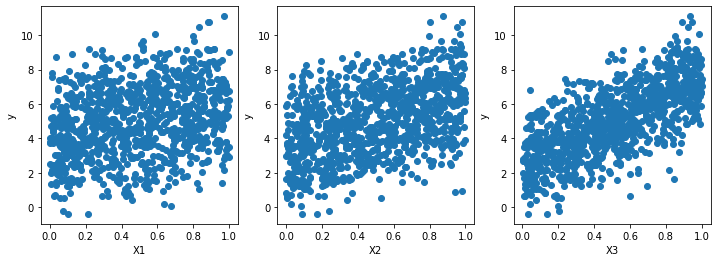

In [6]:
# visualizing the distribution of x1, x2, x3 against y
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].scatter(X1, y)
axs[0].set_xlabel('X1')
axs[0].set_ylabel('y')

axs[1].scatter(X2, y)
axs[1].set_xlabel('X2')
axs[1].set_ylabel('y')

axs[2].scatter(X3, y)
axs[2].set_xlabel('X3')
axs[2].set_ylabel('y')

plt.show()

In [7]:
# Importing python package for Linear Regression
from sklearn.linear_model import LinearRegression

In [8]:
# Fitting the model to the training data 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predicting from test data 
y_pred = regressor.predict(X_test)

In [10]:
# Model evaluation using R-squared metric
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

R-squared:  0.7586698086025704


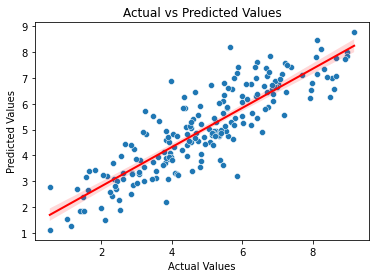

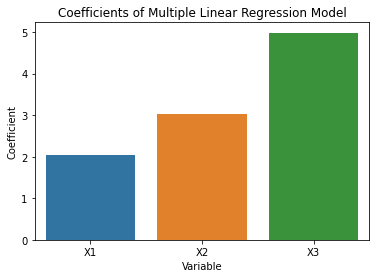

In [11]:
# Visualizing the model and interpreting the results

# plot the predicted vs actual values
sns.scatterplot(x=y_test, y=y_pred)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='r', line_kws={'linewidth': 2})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# plot the coefficients of the model
coefficients = pd.DataFrame({'variable': ['X1', 'X2', 'X3'], 'coefficient': regressor.coef_})
sns.barplot(x='variable', y='coefficient', data=coefficients)
plt.xlabel('Variable')
plt.ylabel('Coefficient')
plt.title('Coefficients of Multiple Linear Regression Model')
plt.show()

### Polynomial Regression

In [12]:
# Using some custom data
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([2.5, 3.6, 7.8, 10.1, 12.7, 16.8])

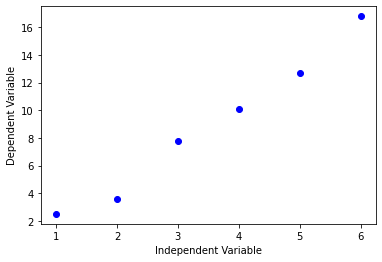

In [13]:
plt.scatter(x, y, color='blue')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

In [14]:
# Reshaping the data to 2D (required by the model)
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [15]:
# python package for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [16]:
# Create polynomial features up to degree 5
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x)

In [17]:
# Fit the linear regression model to the polynomial features
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [18]:
# Evaluate the model on the original data
y_pred = model.predict(x_poly)

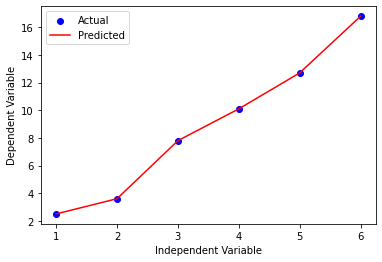

In [19]:
# Visualizing the model predictions
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.legend(["Actual", "Predicted"])
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

### Ridge Linear Regression

In [20]:
# python package for Ridge Regression
from sklearn.linear_model import Ridge

# Fit the ridge regression model to the polynomial features
model = Ridge(alpha=0.3)  # Use L2 regularization with alpha = 0.3 which is a hyperparameter  
model.fit(x_poly, y)  # can be applied without transforming

# Evaluate the model on the original data
y_pred = model.predict(x_poly)

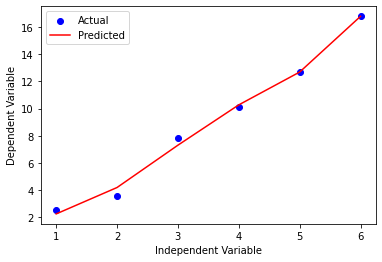

In [21]:
# Plot the original data and the model predictions
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.legend(["Actual", "Predicted"])
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

### Lasso Regression

In [22]:
# python package for Lasso Regression
from sklearn.linear_model import Lasso

# Fit the ridge regression model to the polynomial features
model = Lasso(alpha=0.3)  # Use L2 regularization with alpha = 0.3
model.fit(x_poly, y)  # can be applied without transforming

# Evaluate the model on the original data
y_pred = model.predict(x_poly)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+00, tolerance: 1.485e-02
  model = cd_fast.enet_coordinate_descent(


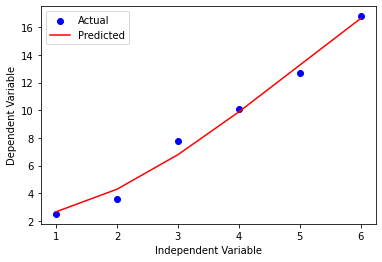

In [23]:
# Plot the original data and the model predictions
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.legend(["Actual", "Predicted"])
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

### Elastic Net

In [24]:
# python package for Elastic Net Regression
from sklearn.linear_model import ElasticNet

# Create and fit the Elastic Net model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Use Elastic Net with alpha = 0.1 and l1_ratio = 0.5
model.fit(x_poly, y)  # can be applied without transforming

# Evaluate the model on the original data
y_pred = model.predict(x_poly)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+00, tolerance: 1.485e-02
  model = cd_fast.enet_coordinate_descent(


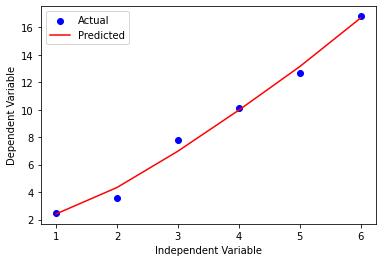

In [25]:
# Plot the original data and the model predictions
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.legend(["Actual", "Predicted"])
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

In [26]:
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01, 2.430e+02],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02, 1.024e+03],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02, 3.125e+03],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03, 7.776e+03]])

In [27]:
# features transformed as x^0, x^1, x^2, x^3, x^4, x^5